<a href="https://colab.research.google.com/github/saurabh000007/Human-Activity-Recognition/blob/main/Human_Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# retrieving data from test and train files
file_X_train='/content/drive/MyDrive/Human Activity Recognition/X_train.txt'
X_train=pd.read_csv(file_X_train,header=None,sep='\n')
file_y_train='/content/drive/MyDrive/Human Activity Recognition/y_train.txt'
y_train=pd.read_csv(file_y_train,header=None,sep='\n')
file_X_test='/content/drive/MyDrive/Human Activity Recognition/X_test.txt'
X_test=pd.read_csv(file_X_test,header=None,sep='\n')
file_y_test='/content/drive/MyDrive/Human Activity Recognition/y_test.txt'
y_test=pd.read_csv(file_y_test,header=None,sep='\n')

In [ ]:
# analyzing data
print(X_train)

                                                      0
0       2.8858451e-001 -2.0294171e-002 -1.3290514e-0...
1       2.7841883e-001 -1.6410568e-002 -1.2352019e-0...
2       2.7965306e-001 -1.9467156e-002 -1.1346169e-0...
3       2.7917394e-001 -2.6200646e-002 -1.2328257e-0...
4       2.7662877e-001 -1.6569655e-002 -1.1536185e-0...
...                                                 ...
7347    2.9966534e-001 -5.7193414e-002 -1.8123302e-0...
7348    2.7385271e-001 -7.7493259e-003 -1.4746837e-0...
7349    2.7338737e-001 -1.7010616e-002 -4.5021828e-0...
7350    2.8965416e-001 -1.8843044e-002 -1.5828059e-0...
7351    3.5150347e-001 -1.2423118e-002 -2.0386717e-0...

[7352 rows x 1 columns]


In [ ]:

# function process_data to split the data through columns into float values
def process_data(df):
    data=[]
    for i in range(df.shape[0]):
        t=df.iloc[i]
        t=t[0].split()
        z=[ float(j) for j in t]
        data.append(z)  
    data=np.array(data)
    return data

In [ ]:

# processing datas
X_train=process_data(X_train)
X_test=process_data(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)

In [ ]:
print(X_train)

[[ 0.28858451 -0.02029417 -0.13290514 ... -0.84124676  0.17994061
  -0.05862692]
 [ 0.27841883 -0.01641057 -0.12352019 ... -0.8447876   0.18028889
  -0.05431672]
 [ 0.27965306 -0.01946716 -0.11346169 ... -0.84893347  0.18063731
  -0.04911782]
 ...
 [ 0.27338737 -0.01701062 -0.04502183 ... -0.77913261  0.24914484
   0.04081119]
 [ 0.28965416 -0.01884304 -0.15828059 ... -0.78518142  0.24643223
   0.02533948]
 [ 0.35150347 -0.01242312 -0.20386717 ... -0.78326693  0.24680852
   0.03669484]]


In [ ]:
print(X_train.shape)

(7352, 561)


In [ ]:
# standardising datas..i.e mean=0 and variance=1
ss=StandardScaler().fit(X_train)
X_train=ss.transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
# making a copy of datas X_tr and X_te having no of components reduced to 2
model1=PCA(n_components=2,whiten=True)
X_tr=model1.fit_transform(X_train)
X_te=model1.transform(X_test)

In [ ]:

# functions for visualizing X_tr and X_te
def legend():
    d={}
    d[1]='cyan'
    d[2]='red'
    d[3]='yellow'
    d[4]='blue'
    d[5]='green'
    d[6]='purple'
    
    k={}
    file='/content/drive/MyDrive/Human Activity Recognition/activity_labels.txt'
    a=pd.read_csv(file,header=None)
    for i in range(a.shape[0]):
        t=a.iloc[i]
        t=t[0]
        t=t.split()
        x,y=t
        x=int(x)
        k[x]=y
        
    return d,k

In [ ]:
def visualize(X_train,y_train):
    key,activity=legend()
    
    label_list=[]
    for i in range(1,7):
        x=mpatches.Patch(color=key[i], label=activity[i])
        label_list.append(x)
    
    for i in range(X_train.shape[0]):
        plt.scatter(X_train[i][1], X_train[i][0] , color=key[y_train[i]])
        
    plt.legend(handles=label_list)
    plt.show()


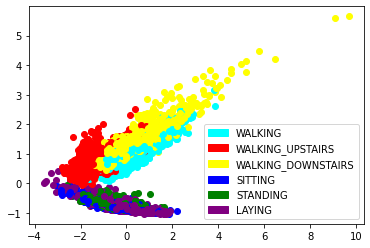

In [ ]:
visualize(X_tr,y_train)

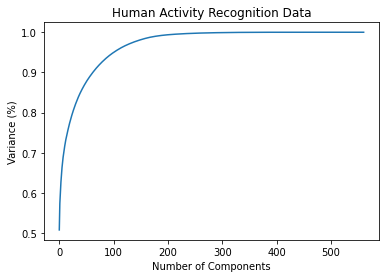

In [ ]:
# now plotting no of components(int the dataset) vs variance to determine no of components for max accuracy
pca = PCA().fit(X_train)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Human Activity Recognition Data')
plt.show()

In [ ]:
# reducing the no of components to around 220 for max accuracy with less execution time
model=PCA(n_components=220,whiten=True)
X_train=model.fit_transform(X_train)
X_test=model.transform(X_test)

In [ ]:

print(X_train.shape)

(7352, 220)


In [ ]:
# splitting the training data to train and dev sets for lower execution time
X_train,X_dev,y_train,y_dev=train_test_split(X_train,y_train,test_size=0.3,random_state=0)

In [ ]:

# training model on linear kernel svm and decision_function_shape=one vs one
model = svm.SVC(decision_function_shape='ovo',kernel='linear')
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# statistical analysis
e_train=model.score(X_train,y_train)
e_dev=model.score(X_dev,y_dev)
e_test=model.score(X_test,y_test)
print('Training accuracy=',e_train)
print('Development accuracy=',e_dev)
print('Testing accuracy=',e_test)

Training accuracy= 0.9959191605130199
Development accuracy= 0.9809610154125114
Testing accuracy= 0.9572446555819477


In [ ]:
print('confusion matrix for development set')
print(confusion_matrix(y_dev,model.predict(X_dev)))

confusion matrix for development set
[[361   0   0   0   0   0]
 [  0 315   0   0   0   0]
 [  1   0 279   0   0   0]
 [  0   0   0 384  22   0]
 [  0   0   0  18 391   0]
 [  0   0   0   1   0 434]]


In [ ]:
print('confusion matrix for test set')
print(confusion_matrix(y_test,model.predict(X_test)))

confusion matrix for test set
[[493   3   0   0   0   0]
 [ 24 447   0   0   0   0]
 [ 11   5 404   0   0   0]
 [  0   2   0 425  64   0]
 [  0   0   0  17 515   0]
 [  0   0   0   0   0 537]]
